# Handschrifterkennung mit MNIST

Im letzten Notebook habt ihr euch mit einfachen Datensätze im zweidimensionalen Raum beschäftigt. Die Auswertung der Modelle war schnell und einfach, die Trainigszeiten kurz. Die Verteilung der Daten in ihrem respektiven Datenraum konnten bequem visualisiert und abgeschätzt werden.

In dieser Session werdet ihr das [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database) kennen lernen, eine Sammlung handgeschriebener Ziffern von 0 bis 9, mit insgesamt um die 60.000 Datenpunkten. Jedes dieser Bilder wird als 768-dimensionaler Vektor bereitgestellt, welcher ein 28 x 28 - pixel großes Bild darstellen soll.

Ladet zunächst den MNIST-Datensatz herunter. Die Daten befinden sich gepackt hinter [diesem link](https://github.com/sebastian-lapuschkin-sideprojects/schuelerpraktikum-2022/blob/master/2_handschrift-und-erkl%C3%A4rbarkeit/2_resources/MNIST.zip). Ladet die Daten herunter, und entpackt den Inhalt im ordner [2_resources](2_resources).


Ihr erhaltet nun vier Dateien:

`train_images.npy` : Bildbeispiele der Trainingsdaten
`train_labels.npy` : Labels der Trainingsdaten

`test_images.npy` : Bildbeispiele der Testdaten
`test_labels.npy` : Labels der Testdaten

Ladet nun all diese Daten mittels der im modul `data_io.py` bereitgestellten Funktionen. Dh. Importiert `data_io` (und ggf weitere module, die ihr bereits kennt und benötigt), ladet alle Daten- und Labelsätze, und legt diese in Variablen ab.

Wieviele Test- und Trainingsdaten stehen zur Verfügung? Wie sind die Labels kodiert? Welche Form haben die geladenen Arrays? Macht euch auf dieser fundamentalen Ebene mit den Daten vertraut.

In [1]:
# TODO Modulimporte
import numpy as np
import data_io

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

import modules
import model_io
import render

In [2]:
# TODO Daten lesen

X_train = data_io.read('./2_resources/train_images.npy')
Y_train = data_io.read('./2_resources/train_labels.npy')

X_test = data_io.read('./2_resources/test_images.npy')
Y_test = data_io.read('./2_resources/test_labels.npy')

print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

loading np-formatted data from ./2_resources/train_images.npy
loading np-formatted data from ./2_resources/train_labels.npy
loading np-formatted data from ./2_resources/test_images.npy
loading np-formatted data from ./2_resources/test_labels.npy
(60000, 784)
(60000, 1)
(10000, 784)
(10000, 1)


Die Date sind as 784-dimensionale Vektoren in den Zeile der Arrays / Matritzen abgelegt. Die Funktionen `plt.scatter`, `plt.plot` (aus dem als `plt` importierten Modul `matplotlib.pyplot` aus dem letzten Tutorial sind für euch daher leider wenig nützlich zur visualisierung. Benutzt die funktionen `np.reshape` (aus dem als `np` importierten Modul `numpy`), um aus einigen Beispielen, bzw den hochdimensionalen Vektoren welche diese repräsentieren, 28 x 28 - dimensionale / pixel große Arrays zu formen.

Visualisiert diese Datenpunkte mittels `plt.imshow` und schreibt das Label der Zahl an die Grafik, und nutzt die colormap `binary`. Evtl werdet ihr noch Nutzen für die Funktion `np.transpose` haben.

Text(0.5, 1.0, 'Class 5.0')

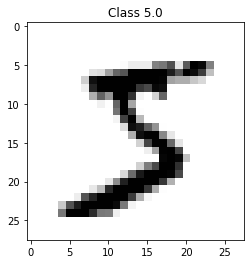

In [3]:
# TODO einzelne Datenpunkte visualisieren
i = 0 # digit index
plt.imshow(X_train[i].reshape(28,28), cmap='binary')
plt.title('Class {}'.format(Y_train[i][0]))

Da nicht einfach alle Daten zeitgleich in einem zweidimensionalen visualisierbar sind wollen wir nun ein "Embedding" (also eine "Einbettung") verwenden, um die Verteilung der Daten approximiert darzustellen. Macht euch die mit `sklearn.manifold.TSNE` (modulimport nicht vergessen!) zur Verfügung gestellte Implementierung zu nutze, [TSNE](https://www.cs.toronto.edu/~hinton/absps/tsne.pdf)-methode um die Verteilung Hochdimensionalen Zahlen approximiert im $\mathbb{R}^2$ zu berechnen.

Aus einem N x 784 - dimensionalen Array solltet ihr über TSNE ein N x 2 - dimensionales Array erhalten. Die Laufzeit von TSNE hängt von der Komplexität der Daten, als auch der Datenanzahl ab. Das Verfahren arbeitet iterativ und versucht die Punkte ihrer paarweisen ähnlichkeit entsprechend in einen üblicherweise (wie spezifiziert) niedriger-dimensionalen Raum einzubetten. Versucht es daher zunächst ggf erst mit den Testdaten. Ihr könnt TSNE über die signatur so konfigurieren, dass alle verfügbaren Prozessoren genutzt werden.

In [4]:
# TODO Embedding für einen oder beide der Datensätze berechnen ...,
X_test_embedded = TSNE(n_jobs=-1).fit_transform(X_test)
print(X_test_embedded.shape)

/home/lapuschkin/miniconda3/envs/praktikum/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/lapuschkin/miniconda3/envs/praktikum/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(10000, 2)


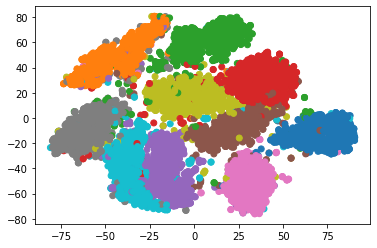

In [5]:
# und mit plt.scatter visualisieren. Färbt die Punkte mittels der verfügbaren Labels ein. Nutzt eine geeignete Color Map, zb tab10, passend zu den 10 Klassenlabels des MNIST datensatzes. 
plt.scatter(X_test_embedded[:,0], X_test_embedded[:,1], c=Y_test, cmap='tab10')

Diskutiert nun die Daten, und deren Verteilung bevor es weiter zum Training geht. Was erkennt ihr?

## Trainieren auf MNIST

Trainiert nun ein einfaches Multi-Layer-Perceptron (MLP) auf den Daten.
Baut jedoch ein Netzwerk `nn` auf, ähnlich wie im Fall der 2D-Daten. Das MLP wird die Daten in Vektorformat erwarten, also NICHT umgeformt zu 28 x 28 pixel großen bilder. Später werden wir ein kleines Convolutional Neural Network nutzen, welches die Daten in Bildform erwartet. Der Trainingsloop ist mit `nn.train()` vorgegeben.

Folgende Schritte sind durchzuführen:
1) Verschiebt den Wertebereich der Daten von der range [0 255] auf [-1 1]. Teilt dazu zuerst die Matrix durch 127.5, und zieht dann 1 von der Matrix ab. Die Funktionen `np.min` und `np.max` können euch beim Verifizieren der Wertebereiche vor und nach der Transformation helfen.
2) Konvertiert die Labels von den gegebenen numerischen klassenlabels zu indikatorvektoren. zb sollte ein Label `[3]` zu `[0,0,0,1,0,0,0,0,0,0]`  umgewandelt werden. Beachtet auch hier das 0-basierte indexing. Wir führen diesen Schritt durch, um einen 10-dimensionalen Indikatorvektor als Label für das 10-Klassen NN zu erhalten.
3) Kostruiert als Neuronales Netz `nn` ein `modules.Sequential`-Objekt mit folgenden Schichtmodulen aus den Klassen in `modules`: [1] `Flatten` (sorgt dafür, dass jeder input egal welcher `shape` in einen einachsigen Vektor ausgerollt wird.), [2] ein `Linear` welches den 784-dimensinalen Input mit 960 versteckten dimensinonen verbindet. [3] eine `Rect`-Nichtlinearität, [4] ein weiteres `Linear` welches die vorherigen Features entgegennimmt und wiederrum 960 dimensionen ausgibt, [5] ein weiteres `Rect` und ein abschließendes `Linear` layer welches auf die 10 möglichen Klassen abbildet, sowie ein `SoftMax`, welches die finalen Vorhersagen in Wahrscheinlichkeitswerte zwischen 0 und 1 umwandelt. Dies erleichtert in der Regel bei binär kodierten Labels das Training. 

Messt abschließend die Performance auf eurem frischen und jetzt noch zufälligen `nn` (ggf sind mehrere Wiederholungen des Experiments nötig). Was beobachtet ihr bei der Performance? Lässt sich ein Bezug zum Datensatz herstellen? (Achtet darauf, die Daten nicht erneut zu prozessieren und zu überschreiben)

In [6]:
# TODO transfer pixel values from [0 255] to [-1 1] to satisfy the expected input / training paradigm of the model
X_train =  X_train / 127.5 - 1
X_test =  X_test / 127.5 - 1

X_test.min(), np.max(X_test)

# TODO transform numeric class labels to vector indicator for uniformity. assume presence of all classes within the label set
I = Y_train[:,0].astype(int)
Y_train = np.zeros([X_train.shape[0],10])
Y_train[np.arange(Y_train.shape[0]),I] = 1

I = Y_test[:,0].astype(int)
Y_test = np.zeros([X_test.shape[0],10])
Y_test[np.arange(Y_test.shape[0]),I] = 1

In [7]:
# TODO build model
nn = modules.Sequential([modules.Linear(784,960),
                         modules.Rect(),
                         modules.Linear(960,960),
                         modules.Rect(),
                         modules.Linear(960,10),
                         modules.SoftMax()
                         ]
                       )

# TODO test initial performance
y_pred = nn.forward(X_test)
acc = np.mean((np.argmax(Y_test, axis=1) == np.argmax(y_pred, axis=1)))
print(acc)

0.1119


Lasst nun das Training über `nn.train` mehrere Epochen (dh. Wiederholungen des Datensatzes) durchlaufen, beobachtet die Performance auf Trainings- und Testdaten. Welchen Bezug könnt ihr zwischen Modellgröße (Anzahl Schichten, anzahl Dimensionen/Neuronen in diesen Schichten) herstellen? Benutzt und importiert ggf. das modul `time` um die Laufzeiten zu messen.

Probiert mehrere Netzarchitekturen durch, und speichert diese mittels der Funktionen in `model_io`. Nutzt ihr `model_io.write(fmt='txt')`, so könnt ihr das Modell mit seiner Architektur und den gelernten Parametern im Menschenlesbaren Textformat ausgeben. Werft einen Blick in die erstellten Dateien.

Ihr könntet (und solltet auch, für das folgende und finale Notebook) das je aktuelle Netzwerk am Ende eines Trainingslaufs/zyklus entsprechend numeriert bennannt speichern, damit wir diese Modelle später laden und ihre Entscheidungsstrategien erklären und visualisieren können. Kürzere, bzw sehr kurze Epochen wären hier von Vorteil.

In [8]:
#TODO: create a for-loop which repeatedly calls a neural network training function, evaluates the current performance, and saves the model after each loop execution
epochs = 10
for e in range(epochs):    
    nn.train(X_train, Y_train, batchsize=64, iters=1000, status=1000)
    acc = np.mean(np.argmax(nn.forward(X_test), axis=1) == np.argmax(Y_test, axis=1))
    print('Epoch {:03d}: model test accuracy is: {:0.4f}'.format(e,acc))
    #model_io.write(nn, './mnist_mlp-e{:03d}.txt'.format(e)) # adapt output file name(s) to your liking.


batch# 100, lrate 0.005, l1-loss 0.4555
batch# 200, lrate 0.005, l1-loss 0.332
batch# 300, lrate 0.005, l1-loss 0.2712
batch# 400, lrate 0.005, l1-loss 0.2591
batch# 500, lrate 0.005, l1-loss 0.2585
batch# 600, lrate 0.005, l1-loss 0.339
batch# 700, lrate 0.005, l1-loss 0.2723
batch# 800, lrate 0.005, l1-loss 0.1718
batch# 900, lrate 0.005, l1-loss 0.2034
Accuracy after 1000 iterations on training data: 95.44% (l1-loss: 0.1667)
    New loss-optimal parameter set encountered. saving....
    Estimate time until current training ends : 0d 0h 0m 0s (100.00% done)
Training terminated after 0d 0h 0m 36s
Setting network parameters to best encountered network state with 95.44% accuracy and a loss of 0.16665377051524674 from iteration 999.
Epoch 000: model test accuracy is: 0.9529
batch# 100, lrate 0.005, l1-loss 0.1936
batch# 200, lrate 0.005, l1-loss 0.1366
batch# 300, lrate 0.005, l1-loss 0.2313
batch# 400, lrate 0.005, l1-loss 0.08116
batch# 500, lrate 0.005, l1-loss 0.09827
batch# 600, lra

After model training has finished, re-use your previously computed TSNE-embedded data as correspondants for the `X_train` or `X_test` (depending on your TSNE input of choice), plot them, but this time instead of using the true labels, predict the labels instead with `nn.forward`, to colorize the dots. You can also plot two figures after one another, one with the predicted labels, one with the true labels.

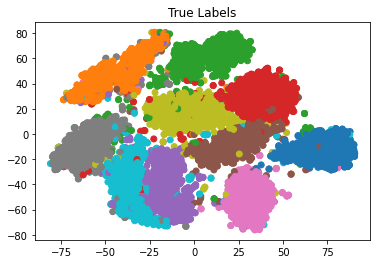

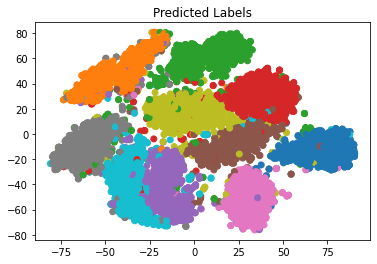

In [9]:
# TODO plot predicted labels on TSNE-embeddings. If you are fancy, you can do this plot after each training epoch to see class memberships in the model's predictions change.
plt.figure()
plt.title('True Labels')
plt.scatter(X_test_embedded[:,0], X_test_embedded[:,1], c=np.argmax(Y_test, axis=1), cmap='tab10')

plt.figure()
plt.title('Predicted Labels')
plt.scatter(X_test_embedded[:,0], X_test_embedded[:,1], c=np.argmax(nn.forward(X_test), axis=1), cmap='tab10')

# Entscheidungen auf Zahlen Erklären

Anders als im Fall des 2D-Datenraums des ersten Notebooks ist es im aktuellen 784-dimensionalen Datenraum nicht ohne weiteres möglich, eine Entscheidungslinie zu visualisieren, um das Vorhersageverhalten eines Neuronalen Netzes zu verstehen. Wir können uns daher gewisser Techniken der Erklärbaren KI (Explainable AI; XAI) bedienen,um diese Interpretationslücke weitestgehend zu schließen. 

In diesem Notebook wollen wir daher [LRP](https://dx.doi.org/10.14279/depositonce-7942) verwenden, um heatmaps zu berechnen welche uns zeigen, welche Merkmale (also Pixelregionen) unser trainiertes Modell verwendet um eine Zahl zu interpretieren und zu verstehen.

## Code Lesen, Verstehen, und Adaptieren 
Eure Aufgabe ist es nun, das Beispielscript [lrp_demo.py](https://github.com/sebastian-lapuschkin/lrp_toolbox/blob/master/python/lrp_demo.py) der [LRP Toolbox](https://github.com/sebastian-lapuschkin/lrp_toolbox) zu lesen, und versuchen zu verstehen. Das Skript, als auch die python-implementierung der LRP-Toolbox verwenden exakt die gleichen Neural Network module, wie sie bei euch im ordner [modules](./modules) zu finden sind, mit identischer Funktionalität, welche auch LRP selbst umfasst.

Extrahiert zunächst die wesentlichen Bausteine aus [lrp_demo.py](https://github.com/sebastian-lapuschkin/lrp_toolbox/blob/master/python/lrp_demo.py) um einen einzelen Datenpunkt eurer Wahl von dem von euch trainierten NN vorhersagen und über LRP erklären zu lassen. Visualisiert diese Erklärung. Alle dafür notwendigen Codebausteine stehen euch bereits zur Verfügung. Viele Sequenzen im verlinkten Beispielskript werden euch bekannt vorkommen.

Sollten eure eigenen Modelle "nichts taugen", das Training sollte fehlgeschlagen sein, oder ihr wollt einfach vergleiche ziehen können, stehen euch hinter [diesem link](https://github.com/sebastian-lapuschkin-sideprojects/schuelerpraktikum-2022/raw/a123e6a4518021fb0f7c3b9069588cd49da75025/2_handschrift-und-erkl%C3%A4rbarkeit/2_resources/MNIST_MODELS.zip) einige gut performende Modelle zur Verfügung, die ihr über die Funktionen in `model_io` laden könnt.

loading pickled model from ./2_resources/long-rect.nn
removing softmax output mapping
True Class:      2
Predicted Class: 2 

saving image to  ./heatmap.png
writing data in npy-format to ./heatmap.npy


(-0.5, 169.5, 83.5, -0.5)

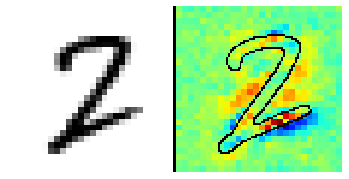

In [10]:
# TODO predict and visualize individual MNIST digit
nn = model_io.read('./2_resources/long-rect.nn') # 99.16% prediction accuracy
nn.drop_softmax_output_layer() #drop softnax output layer for analyses

i=404
x = X_test[i:i+1,...]
y = Y_test[i:i+1,...]

#forward pass and prediction
ypred = nn.forward(x)
print('True Class:     ', np.argmax(y))
print('Predicted Class:', np.argmax(ypred),'\n')

#prepare initial relevance to reflect the model's dominant prediction (ie depopulate non-dominant output neurons).
#any other neuron may be chosen bei setting its position to 1 instead.
mask = np.zeros_like(ypred)
mask[:,np.argmax(ypred)] = 1

Rinit = ypred*mask
R = nn.lrp(Rinit,'epsilon',0.01)    #as Eq(58) from DOI: 10.1371/journal.pone.0130140


#undo input normalization for digit drawing. get it back to range [0,1] per pixel
x = (x+1.)/2.

#render input and heatmap as rgb images
digit = render.digit_to_rgb(x, scaling = 3)
hm = render.hm_to_rgb(R, X = x, scaling = 3, sigma = 2)
digit_hm = render.save_image([digit,hm],'./heatmap.png')
data_io.write(R,'./heatmap.npy')

#display the image as written to file
plt.imshow(digit_hm, interpolation = 'none')
plt.axis('off')

## Bonusaufgabe
Bettet nun die notwendigen Komponenten zur Visualisierung von NN-Entscheidungen in den MNIST-Trainings-Loop ein. Wählt euch initial eine (oder mehrere) Zahlen, auf denen ihr das Verhalten eures NNs während des Trainings beobachten wollt, und lasst euch nach jeder Epoche für diese Zahl eine neue Heatmap berechnen und visualisieren. 